<a href="https://colab.research.google.com/github/salauddinkhan1986/Hand-writing-Recoginition-project/blob/main/Hand_writing_Recoginition_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Deep Neural Network with Keras for MNIST handwritten classification and recognition
**

In [ ]:
from keras.datasets import mnist 

(trainsetX, trainsety),(testsetX,testsety) = mnist.load_data()

print('Train: X = {}, y = {}'.format(trainsetX.shape, trainsety.shape)) 
print('Test: X = {}, y = {}'.format(testsetX.shape, testsety.shape))

Train: X = (60000, 28, 28), y = (60000,)
Test: X = (10000, 28, 28), y = (10000,)


**Libraries**

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
import numpy as np
import pandas as pd



**EDA**

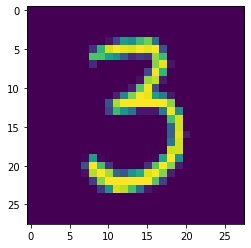

In [ ]:
plt.imshow(trainsetX[50])
plt.show()

In [ ]:
print(trainsety[50])

3


**Data Preparation**

In [ ]:
import tensorflow as tf

In [ ]:
x_train=tf.keras.utils.normalize(trainsetX,axis=1)
x_test=tf.keras.utils.normalize(testsetX,axis=1)

In [ ]:
print(x_train[50])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

**Model Evaluation**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Flatten,Conv2D,MaxPooling2D

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
img_size=28
x_trainr=np.array(x_train).reshape(-1,img_size,img_size,1)
x_testr=np.array(x_test).reshape(-1,img_size,img_size,1)
print(x_trainr.shape)
print(x_testr.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
model =Sequential()
model.add(Conv2D(64,(3,3),input_shape= x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model =Sequential()
model.add(Conv2D(64,(3,3),input_shape= x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model =Sequential()
model.add(Conv2D(64,(3,3),input_shape= x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

In [ ]:
model.add(Dense(32))
model.add(Activation("relu"))

In [ ]:
model.add(Dense(10))
model.add(Activation("sigmoid"))

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 activation_17 (Activation)  (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 10816)             0         
                                                                 
 dense_7 (Dense)             (None, 64)                692288    
                                                                 
 activation_18 (Activation)  (None, 64)                0         
                                                     

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(x_trainr,trainsety, epochs = 25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 39s 26ms/step - loss: 0.2505 - accuracy: 0.9248 - val_loss: 0.1050 - val_accuracy: 0.9692
Epoch 2/25
1500/1500 [==============================] - 39s 26ms/step - loss: 0.0818 - accuracy: 0.9753 - val_loss: 0.0718 - val_accuracy: 0.9776
Epoch 3/25
1500/1500 [==============================] - 38s 25ms/step - loss: 0.0555 - accuracy: 0.9826 - val_loss: 0.0736 - val_accuracy: 0.9770
Epoch 4/25
1500/1500 [==============================] - 38s 25ms/step - loss: 0.0416 - accuracy: 0.9867 - val_loss: 0.0662 - val_accuracy: 0.9797
Epoch 5/25
1500/1500 [==============================] - 37s 25ms/step - loss: 0.0306 - accuracy: 0.9897 - val_loss: 0.0782 - val_accuracy: 0.9762
Epoch 6/25
1500/1500 [==============================] - 38s 25ms/step - loss: 0.0237 - accuracy: 0.9921 - val_loss: 0.0784 - val_accuracy: 0.9789
Epoch 7/25
1500/1500 [==============================] - 38s 25ms/step - loss: 0.0175 - accuracy: 0.9941 - val_loss: 0.0677 -

In [ ]:
result = model.predict([x_testr])

In [ ]:
print(result)

[[3.7756877e-08 9.8281306e-01 7.6056802e-01 ... 1.0000000e+00
  3.2641327e-09 5.2394894e-06]
 [8.8074041e-05 9.9999905e-01 1.0000000e+00 ... 1.5959144e-04
  5.6617302e-09 4.4071243e-16]
 [5.7699999e-06 1.0000000e+00 5.7586118e-07 ... 1.3793150e-01
  9.8906249e-02 3.5027951e-02]
 ...
 [3.7467299e-10 3.6192010e-05 8.6792710e-07 ... 9.8370516e-01
  9.9346584e-01 8.1025672e-01]
 [9.6791678e-07 1.9249900e-11 1.6146898e-04 ... 8.2141161e-03
  9.9922442e-01 5.4571033e-04]
 [9.7944242e-01 8.1722565e-06 1.0522395e-02 ... 4.0383943e-06
  3.2569347e-05 8.1127939e-05]]


In [ ]:
print(np.argmax(result[24]))

4


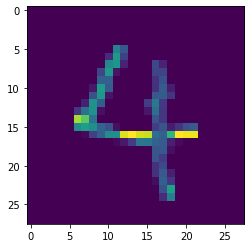

In [ ]:
plt.imshow(x_test[24])